In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [6]:
X, y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, random_state = 42)
X = np.reshape(X, (X.shape[0], 1)) # Pour éviter les erreurs
y = np.reshape(y, (y.shape[0], 1))
X = np.hstack((X, np.ones(X.shape)))
theta =  np.random.rand(X.shape[1],1) 

In [7]:
def hypothesis(X, theta):
    # On utilise la vectorisation pour optimiser le code
    return np.dot(X,theta)

In [8]:
def J(X, y, theta):
    # On définit la fonction de coût J(theta) qui correspond à la MSE
    m = y.shape[0]
    return (1/(2*m)) * sum((X.dot(theta) - y)**2)

In [9]:
def grad(X, y, theta):
    # La dérivée  de J utilisée dans la descente de gradient
    m = y.shape[0]
    return (1/m) * X.T.dot(X.dot(theta) - y)

In [10]:
def grad_desc(X, y, theta, alpha = 0.05, nb_iter = 1000):
    # L'algorithme de descente de gradient avec por défault, alpha = 0.05 et le nombre d'itérations à 1000
    lossList = []
    for i in range(nb_iter):
        lossList.append(J(X, y, theta))
        theta = theta - alpha * grad(X, y, theta)
    return theta, lossList

In [11]:
theta, lossList = grad_desc(X, y, theta, alpha =  0.05,  nb_iter = 1000)

In [12]:
listGraph = lossList[:80]

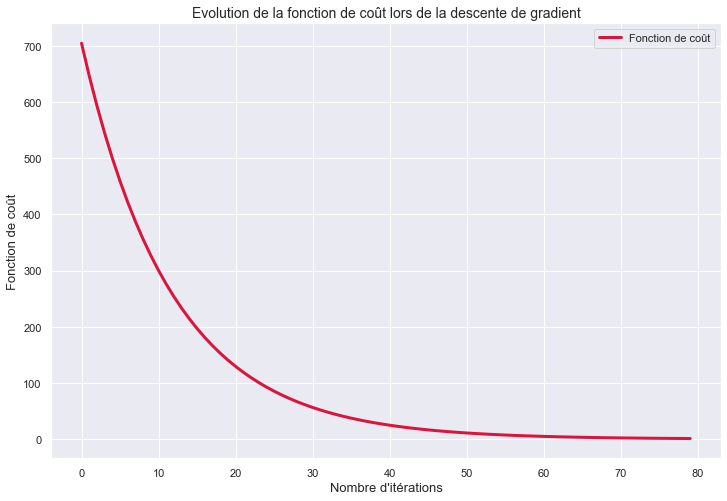

In [13]:
plt.figure(figsize = (12,8))
plt.plot(range(len(listGraph)), listGraph, c = 'crimson', lw = 3, label = 'Fonction de coût')
plt.xlabel('Nombre d\'itérations', fontsize = 13)
plt.ylabel('Fonction de coût', fontsize = 13)
plt.xticks()
plt.yticks()
plt.title('Evolution de la fonction de coût lors de la descente de gradient', fontsize = 14)
plt.legend()
plt.show()
#Note : Il semble qu'on atteint une convergence autour de la 60e itérations de la descente de gradient